In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns

In [332]:
df = pd.read_csv('train.csv')
df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [333]:
df = df.drop('id',1)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_29219/4095100870.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('id',1)


In [334]:
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [335]:
df.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [336]:
df.drop_duplicates(inplace=True)

In [337]:
X = df.copy()

In [338]:
X.shape

(15282, 17)

In [339]:
var_thr = VarianceThreshold(0.01)
var_thr.fit(X)

VarianceThreshold(threshold=0.01)

In [340]:
features_to_use = var_thr.get_support()
features_to_use

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True])

In [341]:
X.columns[features_to_use]

Index(['clonesize', 'honeybee', 'andrena', 'osmia', 'MaxOfUpperTRange',
       'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'seeds', 'yield'],
      dtype='object')

In [342]:
X_improved = X[['clonesize', 'honeybee', 'andrena', 'osmia', 'MaxOfUpperTRange',
       'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'seeds','yield']]

In [343]:
X_improved

,clonesize,honeybee,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,seeds,yield
0,25.0,0.50,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,32.460887,4476.81146
1,25.0,0.50,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,33.858317,5548.12201
2,12.5,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,38.341781,6869.77760
3,12.5,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,39.467561,6880.77590
4,25.0,0.50,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,40.546480,7667.83619
15285,12.5,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,29.467434,3680.56025
15286,25.0,0.50,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,32.299059,4696.44394
15287,25.0,0.50,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,36.674243,6772.93347


<AxesSubplot: >

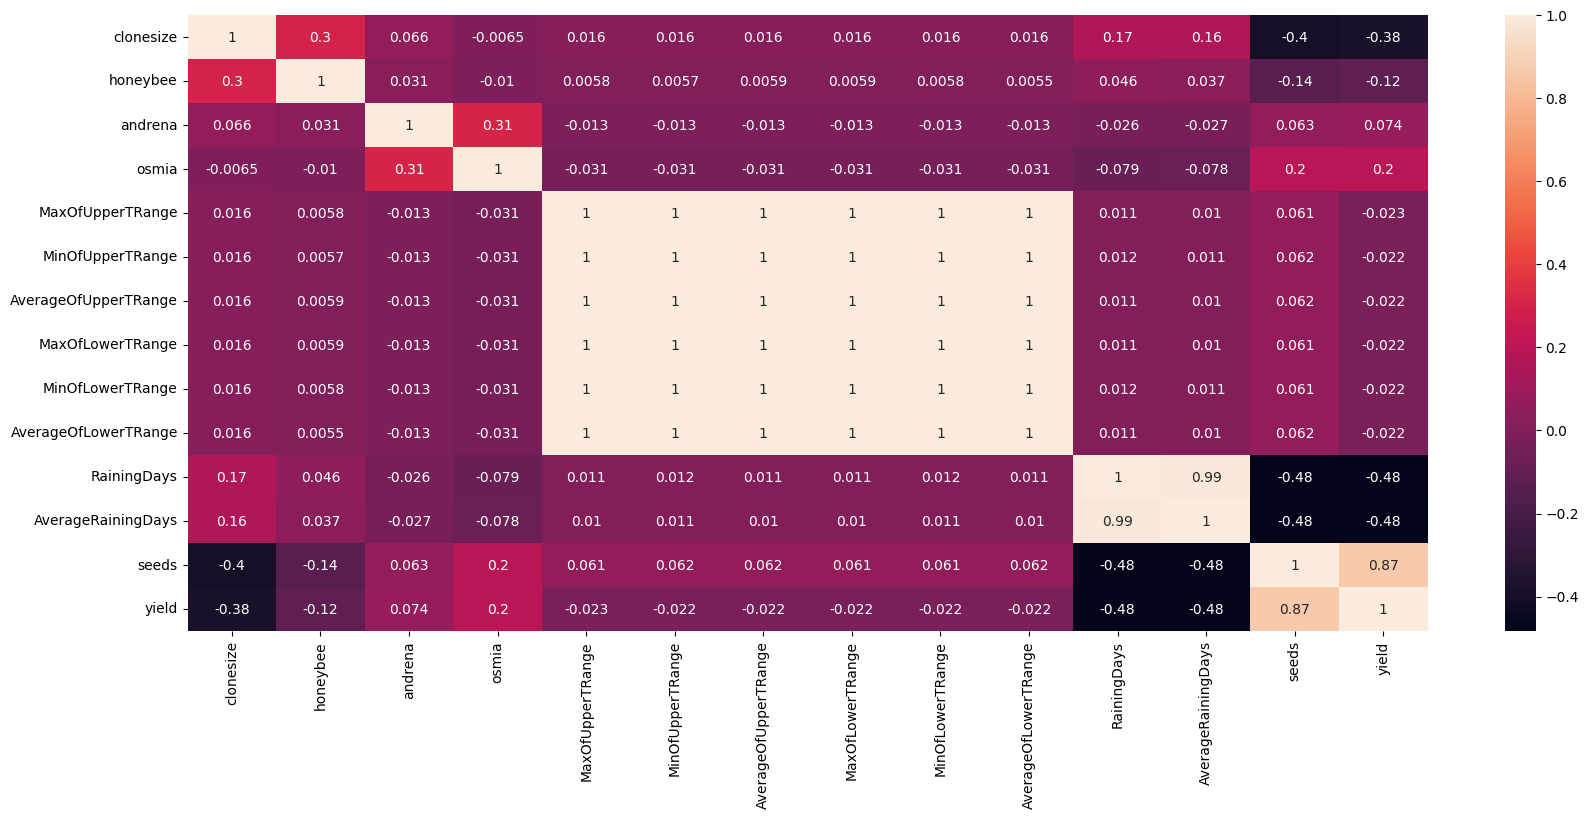

In [344]:
corr = X_improved.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)

In [345]:
X_improved = X_improved.drop(['MaxOfUpperTRange',
       'MinOfUpperTRange', 'MaxOfLowerTRange',
       'MinOfLowerTRange'],1)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_29219/4238642805.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_improved = X_improved.drop(['MaxOfUpperTRange',


In [346]:
X_improved

,clonesize,honeybee,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,seeds,yield
0,25.0,0.50,0.75,0.50,58.2,41.2,24.0,0.39,32.460887,4476.81146
1,25.0,0.50,0.50,0.50,58.2,41.2,24.0,0.39,33.858317,5548.12201
2,12.5,0.25,0.63,0.63,71.9,50.8,24.0,0.39,38.341781,6869.77760
3,12.5,0.25,0.63,0.50,64.7,45.8,24.0,0.39,39.467561,6880.77590
4,25.0,0.50,0.63,0.63,64.7,45.8,24.0,0.39,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.38,0.50,64.7,45.8,16.0,0.26,40.546480,7667.83619
15285,12.5,0.25,0.25,0.50,71.9,50.8,34.0,0.56,29.467434,3680.56025
15286,25.0,0.50,0.38,0.75,64.7,45.8,34.0,0.56,32.299059,4696.44394
15287,25.0,0.50,0.63,0.63,58.2,41.2,24.0,0.39,36.674243,6772.93347


In [347]:
X_improved['AverageOfBothTRange'] = (df['AverageOfUpperTRange'] + df['AverageOfLowerTRange']) / 2

In [348]:
X_improved

,clonesize,honeybee,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,seeds,yield,AverageOfBothTRange
0,25.0,0.50,0.75,0.50,58.2,41.2,24.0,0.39,32.460887,4476.81146,49.70
1,25.0,0.50,0.50,0.50,58.2,41.2,24.0,0.39,33.858317,5548.12201,49.70
2,12.5,0.25,0.63,0.63,71.9,50.8,24.0,0.39,38.341781,6869.77760,61.35
3,12.5,0.25,0.63,0.50,64.7,45.8,24.0,0.39,39.467561,6880.77590,55.25
4,25.0,0.50,0.63,0.63,64.7,45.8,24.0,0.39,40.484512,7479.93417,55.25
...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.38,0.50,64.7,45.8,16.0,0.26,40.546480,7667.83619,55.25
15285,12.5,0.25,0.25,0.50,71.9,50.8,34.0,0.56,29.467434,3680.56025,61.35
15286,25.0,0.50,0.38,0.75,64.7,45.8,34.0,0.56,32.299059,4696.44394,55.25
15287,25.0,0.50,0.63,0.63,58.2,41.2,24.0,0.39,36.674243,6772.93347,49.70


In [349]:
X_improved.drop(['AverageOfUpperTRange','AverageOfLowerTRange'],1, inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_29219/2824623142.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_improved.drop(['AverageOfUpperTRange','AverageOfLowerTRange'],1, inplace=True)


In [350]:
X_improved

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,yield,AverageOfBothTRange
0,25.0,0.50,0.75,0.50,24.0,0.39,32.460887,4476.81146,49.70
1,25.0,0.50,0.50,0.50,24.0,0.39,33.858317,5548.12201,49.70
2,12.5,0.25,0.63,0.63,24.0,0.39,38.341781,6869.77760,61.35
3,12.5,0.25,0.63,0.50,24.0,0.39,39.467561,6880.77590,55.25
4,25.0,0.50,0.63,0.63,24.0,0.39,40.484512,7479.93417,55.25
...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.38,0.50,16.0,0.26,40.546480,7667.83619,55.25
15285,12.5,0.25,0.25,0.50,34.0,0.56,29.467434,3680.56025,61.35
15286,25.0,0.50,0.38,0.75,34.0,0.56,32.299059,4696.44394,55.25
15287,25.0,0.50,0.63,0.63,24.0,0.39,36.674243,6772.93347,49.70


In [351]:
X_improved.columns

Index(['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'yield', 'AverageOfBothTRange'],
      dtype='object')

In [352]:
scaler = StandardScaler()
X_improved[['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange']] =  scaler.fit_transform(X_improved[['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange']].values)

In [353]:
X_improved

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,yield,AverageOfBothTRange
0,0.803499,0.306125,1.737351,-0.662449,0.458085,0.401706,-0.919396,4476.81146,-1.367671
1,0.803499,0.306125,0.049264,-0.662449,0.458085,0.401706,-0.572557,5548.12201,-1.367671
2,-1.092649,-0.385088,0.927069,0.269841,0.458085,0.401706,0.540228,6869.77760,0.420127
3,-1.092649,-0.385088,0.927069,-0.662449,0.458085,0.401706,0.819644,6880.77590,-0.515973
4,0.803499,0.306125,0.927069,0.269841,0.458085,0.401706,1.072049,7479.93417,-0.515973
...,...,...,...,...,...,...,...,...,...
15284,-1.092649,-0.385088,-0.761017,-0.662449,-0.228251,-0.391548,1.087429,7667.83619,-0.515973
15285,-1.092649,-0.385088,-1.638822,-0.662449,1.316005,1.439038,-1.662364,3680.56025,0.420127
15286,0.803499,0.306125,-0.761017,1.130416,1.316005,1.439038,-0.959561,4696.44394,-0.515973
15287,0.803499,0.306125,0.927069,0.269841,0.458085,0.401706,0.126349,6772.93347,-1.367671


In [354]:
X_improved.describe()

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,yield,AverageOfBothTRange
count,1.528200e+04,1.528200e+04,1.528200e+04,1.528200e+04,1.528200e+04,1.528200e+04,1.528200e+04,15282.000000,1.528200e+04
mean,-2.043473e-16,6.044402e-17,5.123793e-16,-2.417761e-16,3.175636e-16,5.346971e-17,8.857374e-17,6025.329057,-1.065675e-15
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1336.479361,1.000033e+00
min,-1.471878e+00,-1.076301e+00,-3.326908e+00,-4.248179e+00,-1.515131e+00,-1.611938e+00,-3.496107e+00,1945.530610,-1.367671e+00
25%,-1.092649e+00,-3.850884e-01,-7.610169e-01,-6.624488e-01,-2.282507e-01,-3.915479e-01,-7.278960e-01,5128.163510,-5.159731e-01
50%,8.034993e-01,3.061245e-01,4.926446e-02,2.698411e-01,-2.282507e-01,-3.915479e-01,-3.090087e-02,6117.475900,4.201270e-01
75%,8.034993e-01,3.061245e-01,9.270692e-01,1.130416e+00,4.580852e-01,4.017059e-01,7.428709e-01,7019.694380,4.201270e-01
max,3.078877e+00,4.987991e+01,1.737351e+00,1.130416e+00,1.316005e+00,1.439038e+00,2.586202e+00,8969.401840,1.356227e+00


In [355]:
X_improved.drop_duplicates(inplace=True)

In [356]:
X_improved

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,yield,AverageOfBothTRange
0,0.803499,0.306125,1.737351,-0.662449,0.458085,0.401706,-0.919396,4476.81146,-1.367671
1,0.803499,0.306125,0.049264,-0.662449,0.458085,0.401706,-0.572557,5548.12201,-1.367671
2,-1.092649,-0.385088,0.927069,0.269841,0.458085,0.401706,0.540228,6869.77760,0.420127
3,-1.092649,-0.385088,0.927069,-0.662449,0.458085,0.401706,0.819644,6880.77590,-0.515973
4,0.803499,0.306125,0.927069,0.269841,0.458085,0.401706,1.072049,7479.93417,-0.515973
...,...,...,...,...,...,...,...,...,...
15284,-1.092649,-0.385088,-0.761017,-0.662449,-0.228251,-0.391548,1.087429,7667.83619,-0.515973
15285,-1.092649,-0.385088,-1.638822,-0.662449,1.316005,1.439038,-1.662364,3680.56025,0.420127
15286,0.803499,0.306125,-0.761017,1.130416,1.316005,1.439038,-0.959561,4696.44394,-0.515973
15287,0.803499,0.306125,0.927069,0.269841,0.458085,0.401706,0.126349,6772.93347,-1.367671


In [357]:
X = X_improved.drop('yield',axis=1)
y = X_improved['yield']

In [2]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(loss='absolute_error'),
    "                               XGBoost": XGBRegressor(),
#     "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}


In [4]:
for name, model in models.items():
    print(name, cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=7, n_jobs=-1).mean())

NameError: name 'cross_val_score' is not defined

In [360]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [361]:
X_improved.columns

Index(['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'yield', 'AverageOfBothTRange'],
      dtype='object')

In [362]:
df_test['AverageOfBothTRange'] = (df_test['AverageOfUpperTRange'] + df_test['AverageOfLowerTRange']) / 2

In [363]:
X_train.columns

Index(['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange'],
      dtype='object')

In [364]:
df_test = df_test[['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange']]

In [365]:
df_test

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,AverageOfBothTRange
0,25.0,0.25,0.25,0.25,24.0,0.39,31.394569,61.35
1,12.5,0.25,0.75,0.63,1.0,0.10,36.846956,67.45
2,12.5,0.25,0.63,0.63,16.0,0.26,40.037644,61.35
3,25.0,0.50,0.38,0.63,16.0,0.26,33.116091,61.35
4,37.5,0.75,0.25,0.25,24.0,0.39,29.558019,67.45
...,...,...,...,...,...,...,...,...
10189,25.0,0.25,0.25,0.25,24.0,0.39,34.525258,61.35
10190,25.0,0.50,0.50,0.75,16.0,0.26,35.648221,55.25
10191,25.0,0.50,0.50,0.50,16.0,0.26,37.724724,55.25
10192,12.5,0.25,0.38,0.50,34.0,0.56,31.881847,67.45


In [366]:
df_test[['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange']] =  scaler.fit_transform(df_test[['clonesize', 'honeybee', 'andrena', 'osmia', 'RainingDays',
       'AverageRainingDays', 'seeds', 'AverageOfBothTRange']].values)

In [367]:
df_test

,clonesize,honeybee,andrena,osmia,RainingDays,AverageRainingDays,seeds,AverageOfBothTRange
0,0.789503,-0.363088,-1.628845,-2.453506,0.466288,0.408256,-1.179639,0.415540
1,-1.106867,-0.363088,1.745905,0.262907,-1.486257,-1.345772,0.176782,1.350968
2,-1.106867,-0.363088,0.935965,0.262907,-0.212858,-0.378032,0.970547,0.415540
3,0.789503,0.277932,-0.751410,0.262907,-0.212858,-0.378032,-0.751366,0.415540
4,2.685873,0.918953,-1.628845,-2.453506,0.466288,0.408256,-1.636527,1.350968
...,...,...,...,...,...,...,...,...
10189,0.789503,-0.363088,-1.628845,-2.453506,0.466288,0.408256,-0.400800,0.415540
10190,0.789503,0.277932,0.058530,1.120722,-0.212858,-0.378032,-0.121434,-0.519888
10191,0.789503,0.277932,0.058530,-0.666392,-0.212858,-0.378032,0.395149,-0.519888
10192,-1.106867,-0.363088,-0.751410,-0.666392,1.315221,1.436480,-1.058416,1.350968


In [372]:
gb_regressor = GradientBoostingRegressor(loss='absolute_error')
bagging = BaggingRegressor(base_estimator=gb_regressor, n_estimators=200, n_jobs=-1, max_samples=0.8)
bagging.fit(X, y)

BaggingRegressor(base_estimator=GradientBoostingRegressor(loss='absolute_error'),
                 max_samples=0.8, n_estimators=200, n_jobs=-1)

In [374]:
y_prediction = bagging.predict(df_test)

In [376]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub['yield'] = y_prediction

In [384]:
sample_sub.to_csv('submission.csv',index=False)

In [385]:
ls

Prediction of Wild Blueberry Yield.ipynb
catboost_info/
sample_submission.csv
submission.csv
test.csv
train.csv


In [386]:
sub = pd.read_csv('submission.csv')

In [387]:
sub

,id,yield
0,15289,4339.653907
1,15290,6325.339513
2,15291,7173.967089
3,15292,5214.331877
4,15293,3748.481304
...,...,...
10189,25478,5356.206890
10190,25479,5771.183552
10191,25480,6432.143484
10192,25481,4536.982140
